# CCL matter power spectra calculations

In this example, we will calculate the matter power spectrum using different options for the transfer function (CAMB, CLASS, etc.), different options for the matter power spectrum (emulator, with baryons) and different cosmologies, including parametrized Modified Gravity.

Note that you will need CAMB and CLASS installed in your system. You can check our installation instructions for further details: https://ccl.readthedocs.io/en/v2.0.0/source/installation.html

In [1]:
import numpy as np
import pyccl as ccl
import pylab as plt
import math
%matplotlib inline

We begin by defining a set of cosmological parameters, as usual:

In [2]:
Omega_c = 0.25; Omega_b = 0.05; h = 0.7; A_s = 2.1e-9; n_s = 0.96; Neff = 3.046; m_nu = 0.

Set up some different mu_0 / Sigma_0 pairs.

In [3]:
mu_0 = [0.3, -0.3, 0.3, -0.3]
sigma_0 = [0.3, -0.3, -0.3, 0.3]

Set up the cosmology objects, including one where mu_0 = sigma_0 = 0, the GR case. We set the matter power spectrum type to linear the mu / Sigma parameterisation only supports linear scales.

In [4]:
cosmo_GR_C = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b, h = h, A_s = A_s, n_s = n_s, 
                         Neff = Neff, m_nu = m_nu, matter_power_spectrum='linear',
                           transfer_function='boltzmann_camb')

cosmo_1_C = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b, h = h, A_s = A_s, n_s = n_s, 
                         Neff = Neff, m_nu = m_nu, mu_0 = mu_0[0], sigma_0 = sigma_0[0],
                        matter_power_spectrum='linear',transfer_function='boltzmann_camb')

#cosmo_2_C = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b, h = h, A_s = A_s, n_s = n_s, 
#                        Neff = Neff, m_nu = m_nu, mu_0 = mu_0[1], sigma_0 = sigma_0[1], 
#                       matter_power_spectrum='linear',transfer_function='boltzmann_isitgr')

cosmo_GR_I = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b, h = h, A_s = A_s, n_s = n_s, 
                         Neff = Neff, m_nu = m_nu, matter_power_spectrum='linear',
                           transfer_function='boltzmann_isitgr')

cosmo_1_I = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b, h = h, A_s = A_s, n_s = n_s, 
                         Neff = Neff, m_nu = m_nu, mu_0 = mu_0[0], sigma_0 = sigma_0[0],
                        matter_power_spectrum='linear',transfer_function='boltzmann_isitgr')

#cosmo_2 = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b, h = h, A_s = A_s, n_s = n_s, 
 #                        Neff = Neff, m_nu = m_nu, mu_0 = mu_0[1], sigma_0 = sigma_0[1], 
#                       matter_power_spectrum='linear',transfer_function='boltzmann_isitgr')


Compute the linear matter power spectrum (support for this parameterisation is limited to the linear regime). Again, the matter power spectrum is only affected by $\mu_0$, not $\Sigma_0$.

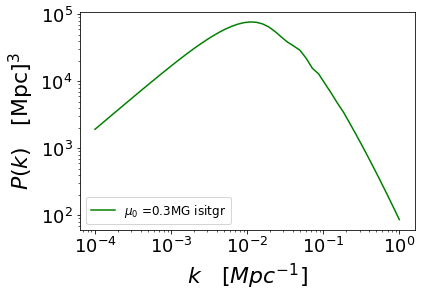

In [8]:
k = np.logspace(-4, 0) # 1 / Mpc units

#Pk_GR_I = ccl.linear_matter_power(cosmo_GR_I, k, a=1.)
Pk_1_I = ccl.linear_matter_power(cosmo_1_I, k, a=1.)
#Pk_GR_C = ccl.linear_matter_power(cosmo_GR_C, k, a=1.)
#Pk_1_C = ccl.linear_matter_power(cosmo_1_C, k, a=1.)


#plt.loglog(k, Pk_GR_I, 'k', label='GR isitgr')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.loglog(k, Pk_1_I, 'g', label='$\mu_0$ ='+str(mu_0[0])+'MG isitgr')

#plt.loglog(k, Pk_GR_C, 'r', label='GR with camb')

#plt.loglog(k, Pk_1_C, 'b', label='$\mu_0$ ='+str(mu_0[0])+'MG with rescaled Pk')

plt.xlabel('$k\quad[Mpc^{-1}]$', fontsize = 22)
plt.ylabel('$P(k)\quad[{\\rm Mpc}]^3$', fontsize=22)
plt.legend(fontsize=12)
plt.show()

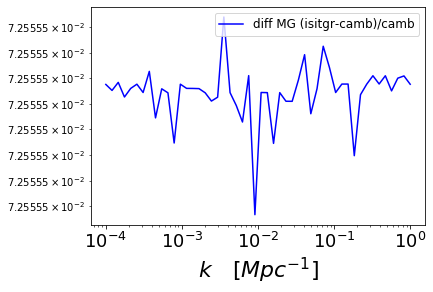

In [6]:
diff_GR = abs(Pk_GR_I - Pk_GR_C)/Pk_GR_C
diff_MG = abs(Pk_1_I - Pk_1_C)/Pk_1_C

#plt.loglog(k, diff_GR, 'r', label='diff GR (isitgr-camb)/camb')
plt.loglog(k, diff_MG, 'b', label='diff MG (isitgr-camb)/camb')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)


plt.xlabel('$k\quad[Mpc^{-1}]$', fontsize = 22)
#plt.ylabel('$P(k)\quad[{\\rm Mpc}]^3$', fontsize=22)
plt.legend(fontsize=12)
plt.show()

In [7]:
diff_GR

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])